# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1490]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [1491]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

# A class used to represent the performance of one instruction
# Can be used to count the exact number of instructions
# ! Not required
class Statistics:
    def __init__(self):
        self.instruction = 0
        self.memory = 0

    def __str__(self):
        return f"Instructions: {self.instruction}, Memory Spaces: {self.memory}."

    def reset(self):
        self.instruction = 0
        self.memory = 0

    def addInstruction(self, step=1):
        self.instruction += step
    
    def addMemory(self, size=1):
        self.memory += size

# Enum-Like class to represent the types of BST
# ! enum can not be imported so I implemented my own version
class TreeType:
    def __init__(self):
        self.LLRB = "LLRB"
        self.AVL = "AVL"
        self.TwoThree = "TwoThree"

treeType = TreeType()

class StatUtil:
    def mean(arr: list):
        return sum(arr)/len(arr)
    
class Collections:
    def __init__(self):
        self.BST_time = []
        self.AVL_time = []
        self.TwoThree_time = []
        self.space = []


# Node of Red Black Tree
class RBNode:
    def __init__(self, val):
        self.val = val
        self.left: RBNode = None
        self.right: RBNode = None
        self.is_red = True

Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [1492]:
class TwoThreeTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found    

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [1493]:
class AVLTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found  

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [1494]:
class LLRBBST(AbstractSearchInterface):

    def __init__(self):
        self.root = None
        self.stat = Statistics()
        self.inserted = False

    def check_red(self, node: RBNode):
        return node.is_red if node is not None else False
    
    def rotate_left(self, high: RBNode):

        # Rotate the nodes
        # right_ptr is a pointer to the right node of high
        # high's right child became right_ptr's left child
        # right_ptr's left child became high
        right_ptr = high.right
        high.right = right_ptr.left
        right_ptr.left = high
        # Now right_ptr is the highest node

        # Inherit the color
        right_ptr.is_red = high.is_red
        # Modify previous high's color
        high.is_red = True
        return right_ptr
    
    def rotate_right(self, high: RBNode):

        # In the same way
        left_ptr = high.left
        high.left = left_ptr.right
        left_ptr.right = high

        left_ptr.is_red = high.is_red
        high.is_red = True
        return left_ptr

    # Call this method when concurrent red nodes occur
    def flip(self, high: RBNode):
        # Set the highest node to be red
        high.is_red = True
        # Its childern to be black
        high.left.is_red = False
        high.right.is_red = False

    def fix_up(self, node: RBNode):
        # Fix right-leaning red note
        if self.check_red(node.right) and not self.check_red(node.left):
            node = self.rotate_left(node)

        # Fix two consecutive red notes
        if self.check_red(node.left) and self.check_red(node.left.left):
            node = self.rotate_right(node)

        # Fix two red children
        if self.check_red(node.left) and self.check_red(node.right):
            self.flip(node)

        return node

        
    def insertElement(self, element):
        # ADD YOUR CODE HERE
        self.stat.reset()
        # If no root, let it be root
        if self.root is None:
            # Black root
            self.root = RBNode(element)
            self.root.is_red = False
            return True
        
        self.inserted = False

        def insert_helper(node: RBNode, val):

            self.stat.addInstruction()

            # Insert the node
            if node is None:
                self.stat.addMemory()
                self.inserted = True
                new_node = RBNode(val)
                new_node.is_red = True
                return new_node

            # Looking for the node
            if val < node.val:
                node.left = insert_helper(node.left, val)
            elif val > node.val:
                node.right = insert_helper(node.right, val)
            else:
                # Failed to insert the node, return directly
                return node

            # Fix the tree
            return self.fix_up(node)

        self.root = insert_helper(self.root, element)
        self.root.is_red = False    
        return self.inserted
    
    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        self.stat.reset()
        current = self.root
        while current is not None:
            self.stat.addInstruction()
            if element == current.val:
                found = True
                return found
            elif element < current.val:
                current = current.left
            else:
                current = current.right

        
        return found  

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [1495]:
class BTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [1496]:
class ScapegoatTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found 

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [1497]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    '''
    
    #ADD YOUR CODE HERE
    
    def __init__(self, size=1024, seed=None):
        self.size = size
        if seed is not None:
            random.seed(seed)

    # Generate random Integer List
    def IntegerRandom(self, min=-10000, max=10000, unique=True):
        if unique and (max-min+1) < self.size:
            raise ValueError("Not supported range")
        
        if unique:
            return [str(x) for x in random.sample(range(min, max+1), self.size)]
        else:
            return [str(random.randint(min, max)) for _ in range(self.size)]

    # Generate linear Integer List
    def IntegerLinear(self, start=0, step=1):
        res = []
        for i in range(start, start + self.size):
            res.append(str(step * i))
        return res
    
    # Generate random Float List
    def FloatRandom(self, min=-10000.0, max=10000.0, precision=2):
        return [str(round(random.uniform(min, max), precision)) 
                for _ in range(self.size)]
    
    # Generate random String List

    def StringRandom(self, min_length=3, max_length=100):
        if not isinstance(self.size, int) or self.size < 0:
            raise ValueError("self.size must be a non-negative integer")
        if not (isinstance(min_length, int) and isinstance(max_length, int)):
            raise ValueError("min_length and max_length must be integers")
        if min_length < 0 or max_length < min_length:
            raise ValueError("min_length must be non-negative and less than or equal to max_length")

        def generate_single_string():
            # Random length
            length = random.randint(min_length, max_length)
            # Characters
            charset = string.ascii_letters + string.digits
            return ''.join(random.choices(charset, k=length))
        
        return [generate_single_string() for _ in range(self.size)]
    
    # Generate Integer List where value is around a fixed midpoint
    def IntegerMidpoint(self, min_val=0, max_val=10000):
        if max_val - min_val + 1 < self.size:
            raise ValueError("Range too small for requested size")

        # Ensure unique
        result_set = set()
        # Set the range
        left, right = min_val, max_val

        while len(result_set) < self.size:
            # Calculate midpoint
            mid = (left + right) // 2
            
            # add midpoint
            mid_str = str(mid)
            if len(result_set) < self.size and mid_str not in result_set:
                result_set.add(mid_str)
            
            # determine direction
            if random.random() < 0.5 and left < mid:
                # left
                right = mid - 1
            elif mid < right:
                # right
                left = mid + 1
            else:
                # Then random value
                while len(result_set) < self.size:
                    val = random.randint(min_val, max_val)
                    result_set.add(str(val))

        # Turn to list
        result = list(result_set)
        random.shuffle(result)
        return result
        
    

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [1498]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():

    # Load the BST
    def __init__(self, num_searches: int = 50, repeat_time: int = 5, 
                 repeat_number: int = 50, sampling_rate: int = 50):

        self.LLRB = LLRBBST()
        self.AVL = AVLTree()
        self.TwoThree = TwoThreeTree()
        self.collections = Collections()

        # Number of values to search, when testing
        self.num_searches = num_searches
        # Number of times to repeat the search
        self.repeat_time = repeat_time
        # Number of searchings performed
        self.repeat_number = repeat_number
        # Gap between two search
        self.sampling_rate = sampling_rate

        """
        Example:
            If num_searches = 10, repeat_time = 5, repeat_number = 50
            And we assume each instruction takes 1ms

            Then, in each time we search value:
            -   1. We search 10 random values
            -   2. Repeat 1. for 50 times, sum up the results and take average
            -   3. Repeat 2. for 5 times, take the best result
        """


    # Method to evaluate and draw
    def evaluate(self, dataset: list):
        # Reset the buffer
        self.collections = Collections()
        # Current size of the array
        size = 0
        step = max(1, len(dataset) // self.sampling_rate) # Dynamically Sampling

        for i, data in enumerate(dataset):
            # Insert data
            self.LLRB.insertElement(data)
            self.AVL.insertElement(data)
            self.TwoThree.insertElement(data)
            size += 1

            if i % step == 0 or i == len(dataset) - 1:  # Remain the last point

                # Record the x-axis: The size of the array
                self.collections.space.append(size)

                total_time_LLRB = 0
                total_time_AVL = 0
                total_time_TwoThree = 0

                for _ in range(self.num_searches):
                    # Record the y-axis: Execution time of searching
                    search_data = random.choice(dataset[:i+1]) # Randomly search value

                    # Search on LLRB
                    timer_LLRB = timeit.Timer(lambda: self.LLRB.searchElement(search_data))
                    times_LLRB = timer_LLRB.repeat(repeat=self.repeat_time, number=self.repeat_number)
                    total_time_LLRB += min(times_LLRB) / self.repeat_number

                    # Search on AVL
                    timer_AVL = timeit.Timer(lambda: self.AVL.searchElement(search_data))
                    times_AVL = timer_AVL.repeat(repeat=self.repeat_time, number=self.repeat_number)
                    total_time_AVL += min(times_AVL) / self.repeat_number

                    # Search on TwoThree
                    timer_TwoThree = timeit.Timer(lambda: self.TwoThree.searchElement(search_data))
                    times_TwoThree = timer_TwoThree.repeat(repeat=self.repeat_time, number=self.repeat_number)
                    total_time_TwoThree += min(times_TwoThree) / self.repeat_number

                # Calculate time on each Tree
                avg_time_LLRB = total_time_LLRB / self.num_searches
                avg_time_AVL = total_time_AVL / self.num_searches
                avg_time_TwoThree = total_time_TwoThree / self.num_searches

                # Insert into a list
                self.collections.BST_time.append(avg_time_LLRB * 1e6)
                self.collections.AVL_time.append(avg_time_AVL * 1e6)
                self.collections.TwoThree_time.append(avg_time_TwoThree * 1e6)

    # Helper function to draw the graph
    def visualize(self, title: str = "Algorithm Analysis"):
        plt.figure(figsize=(10, 6), facecolor='white')  
        
        # Define 3 trees
        tree_styles = [
            {'data': self.collections.BST_time, 'label': 'LLRB', 'color': '#4682b4'},  # 蓝色
            {'data': self.collections.AVL_time, 'label': 'AVL', 'color': '#2e8b57'},   # 绿色
            {'data': self.collections.TwoThree_time, 'label': '2-3 Tree', 'color': '#ff6347'}  # 红色
        ]
        
        # Draw the graph
        for tree in tree_styles:
            if tree['data']:  # Check Empty
                plt.plot(self.collections.space, tree['data'], 
                        linestyle='-', 
                        linewidth=2, 
                        color=tree['color'], 
                        label=tree['label'])
        
        # Style
        plt.title(title, 
                fontsize=16, 
                weight='bold', 
                color='#333333', 
                pad=20)
        plt.xlabel('Tree Size', fontsize=12, color='#555555')
        plt.ylabel('Instruction Time (μs)', fontsize=12, color='#555555')  # 添加单位提示
        
        if any(tree['data'] for tree in tree_styles):  # 至少有一种数据非空
            plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='#d0d0d0')
        
        # Grid and Background
        plt.grid(True, linestyle='--', alpha=0.5, color='#d0d0d0')  
        plt.gca().set_facecolor('#fafafa')  
        
        # Stroke
        plt.tick_params(axis='both', colors='#555555', labelsize=10)
        for spine in plt.gca().spines.values():
            spine.set_edgecolor('#d0d0d0')
            spine.set_linewidth(0.5)
        
        plt.tight_layout()
        plt.show()

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

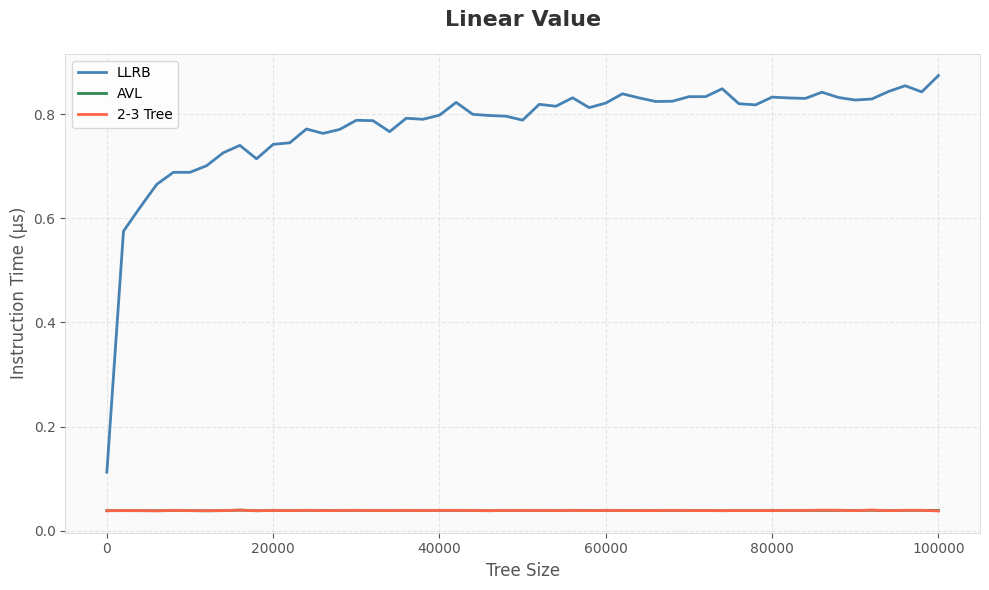

In [1499]:
# ADD YOUR TEST CODE HERE 

testGen = TestDataGenerator(100000)
framework = ExperimentalFramework(num_searches=100)
framework.evaluate(testGen.IntegerLinear(-50000,10))
framework.visualize("Linear Value")

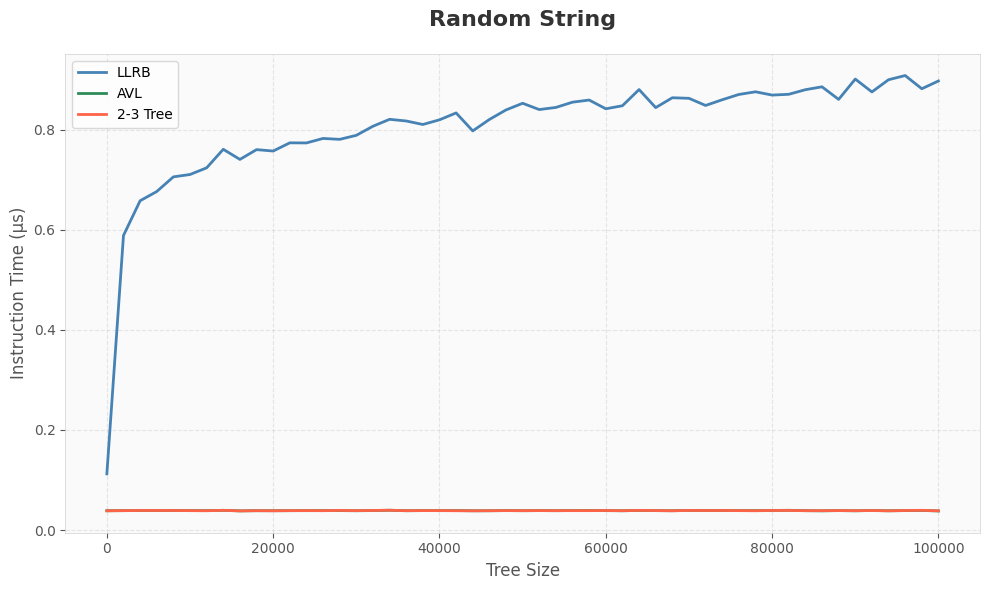

In [1500]:
testGen = TestDataGenerator(100000)
framework = ExperimentalFramework(num_searches=100)
framework.evaluate(testGen.StringRandom(min_length=1, max_length=50))
framework.visualize("Random String")

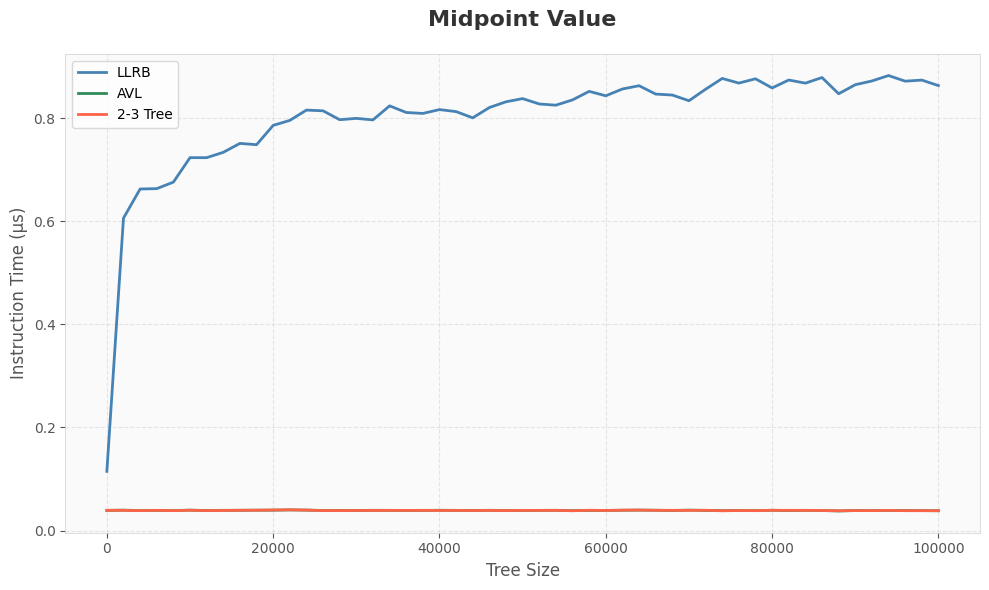

In [1501]:
testGen = TestDataGenerator(100000)
framework = ExperimentalFramework(num_searches=100)
framework.evaluate(testGen.IntegerMidpoint(min_val=-100000, max_val=100000))
framework.visualize("Midpoint Value")

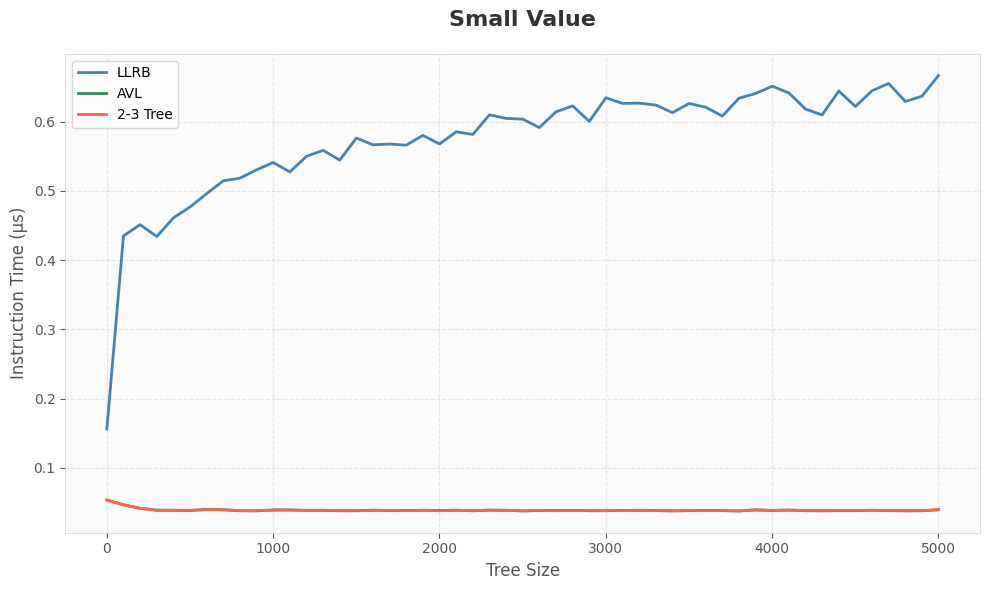

In [1503]:
testGen = TestDataGenerator(5000)
framework = ExperimentalFramework(num_searches=100)
framework.evaluate(testGen.StringRandom())
framework.visualize("Small Value")

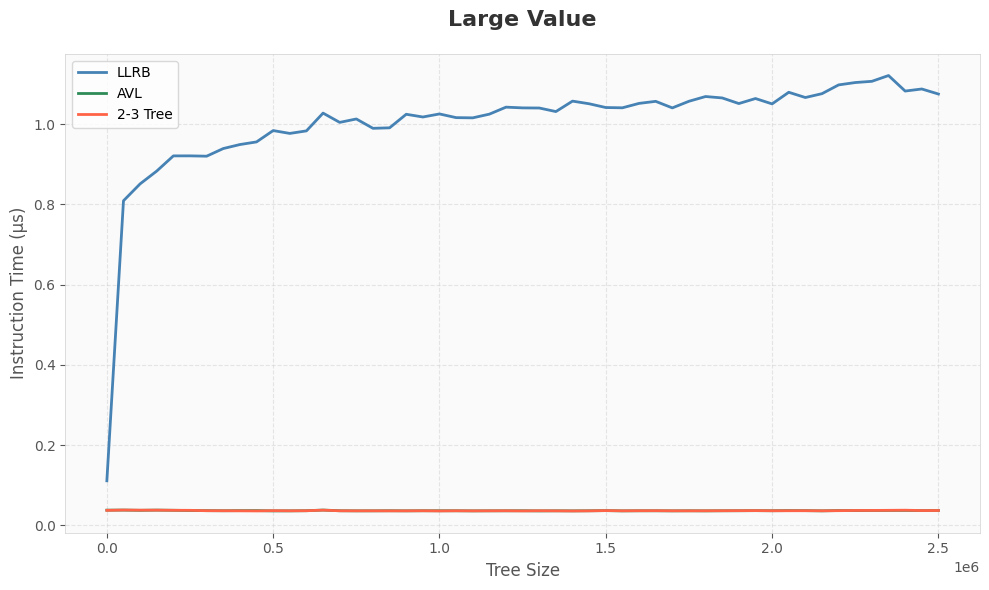

In [ ]:
# This might take you a minute
testGen = TestDataGenerator(1500000)
framework = ExperimentalFramework(num_searches=100)
framework.evaluate(testGen.StringRandom())
framework.visualize("Large Value")